# 첫 번째 신경망 훈련하기: 기초적인 분류 문제

* 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다.

### 패션 MNIST 데이터셋 임포트하기
* 패션 MNIST: 10개의 범주(category)와 70,000개의 흑백 이미지로 구성
* 이미지 해상도(28x28 픽셀)

In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* load_data() 함수 호출 시, 4개의 numpy 배열 반환
* train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
* test_images 와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트

* 이미지 28x28
* 픽셀 0~255
* lable은 0~9까지 정수 배열, 레이블은 이미지에 있는 옷의 class를 의미

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# 데이터 전처리

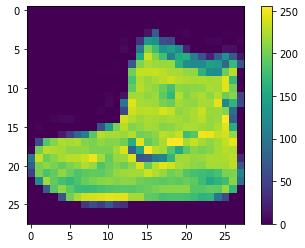

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 색상 코드 알려줌
plt.grid(False) # 격자
plt.show()

In [11]:
# 이미지 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

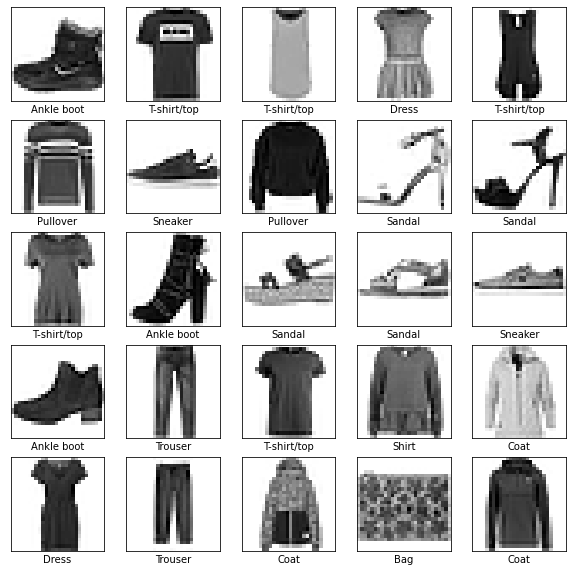

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # for문에서 i는 0부터 시작해서
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()
# xticks yticks imshow show 의미

# 모델 구성

* 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일함

## 층 설정
* 신경망의 기본 구성 요소는 층(layer)
* 층은 주입된 데이터에서 표현을 추출함

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'), # 임의로 설정, 활성화함수
    tf.keras.layers.Dense(10)
]) # 순차적으로 layer를 쌓아 올린다는 의미

1. **tf.keras.layers.Flatten**은 2차원 배열의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 가중치가 없고 데이터를 변환함
2. 픽셀을 펼친 후 두 개의 **tf.keras.layers.Dense** 층이 연속되어 연결됨. 이 층을 밀접 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라 부름. 첫 번째 Dense는 128개의 노드를 가짐. 두 번째 층은 10개 노드를 가짐. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함

## 모델 컴파일

* 손실 함수(Loss function): 훈련하는 동안 모델의 오차를 측정. 이 함수를 최소화 해야 함.
* 옵티마이저(optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정함
* 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용함

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

신경망 모델 훈련 단계
1. 훈련 데이터 모델에 주입 - **train_images**, **train_labels**
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦 - **test_images** 이 예측이 **test_labels** 배열의 레이블과 맞는지 확인

-> 훈련을 시작하기 위해 model.fit 메서드 호출하면 모델이 훈련 데이터를 학습함

In [15]:
# 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.4980 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.3716 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.3372 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.3115 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 1s 687us/step - loss: 0.2937 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.2795 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.2679 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.2554 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.2488 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 1s 664u

# 정확도 평가

In [16]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accurancy:', test_acc)

# verbose = 1 로 하면 ==== bar 가 뜨고 2로 하면 안 뜸

313/313 - 0s - loss: 0.3284 - accuracy: 0.8853
Test accurancy: 0.8852999806404114


* 테스트 정확도가 훈련 세트의 정확도 보다 낮음
* 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문
* **과대적합**: 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상

# 예측만들기

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([6.6923229e-07, 3.4314919e-11, 2.8800702e-07, 2.5700921e-08,
       4.6128477e-08, 7.9631148e-04, 1.7627713e-07, 3.9983704e-03,
       2.0303569e-06, 9.9520206e-01], dtype=float32)

In [20]:
sum(predictions[0])

0.9999999821034066

In [21]:
np.argmax([predictions[0]])

9

In [22]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img) :
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label :
        color = 'blue'
    else :
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label) :
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

* 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
* 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다

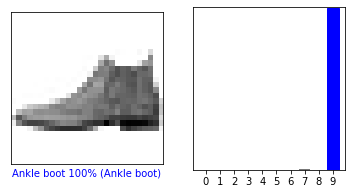

In [31]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

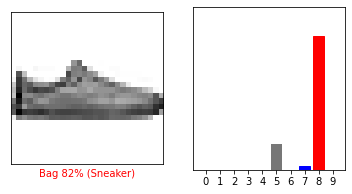

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

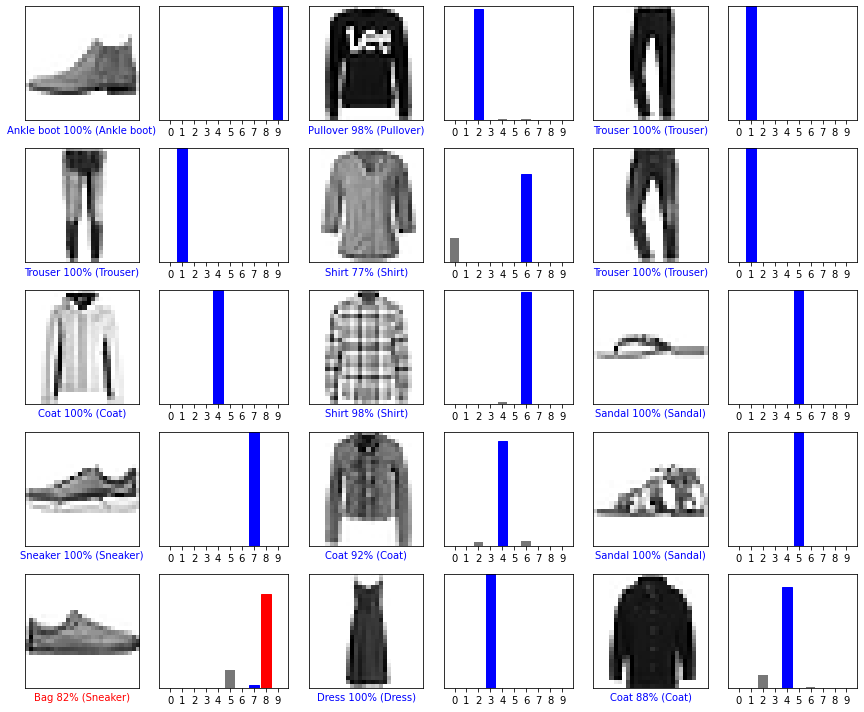

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# trained model 사용

In [43]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


* tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [44]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.6154009e-04 7.0195016e-14 9.7912884e-01 5.9146394e-12 1.2117095e-02
  1.8000358e-14 8.4925555e-03 8.4853221e-18 1.5357144e-09 3.3687038e-12]]


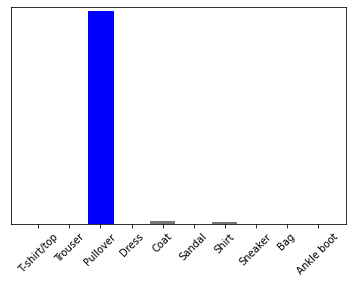

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()